# Introduction

For this project we will be analyzing Houston 311 calls. The data can be downloaded from the City of Houston Open Portal website encompasing 311 calls from 2011 until October 2022 (~3.8 million calls). https://www.houstontx.gov/311/

|Feature | Description |
|:--- | :--- |
|case_number | 	Unique case ID
|sr_location |The location the service request is being called in for |
|county |The county of the service request |
|district | The geocoded Council district of the service request
|neighborhood | The neighborhood of the geocoded service request
|tax_id |The HCAD property tax ID for the service request service_area
|key_map  | Key map of the service request
|management_district | The management district of the service request location
|trash_day| The trash day of the service request location
|heavy_trash_day | The heavy trash day of the service request location
|recycle_day | The recycling day of the service request location
|sr_creator | The creator of the service request
|department | The department the service request is directed to (could be virtual department, e.g. 311 Help Line)
|division | The division the service request is directed to (e.g.Knowledge)
|sr_type | The service request type
|queue | The queue the service request is put into
|sla | The service level agreement days. The number of days the department has from the create date to address the service request
|status | Status of the service request. Closed does not necessarily mean the SR was solved to meet citizen needs.
|sr_create_date | The create date of the service request
|due_date | The due date of the service request based on the SLA days
|date_closed | The date the service request is closed
|overdue | If the number is negative, it means the number days the service request was completed before the SLA was due (or, how many days are remaining to the SLA if the case is still open). If positive, it means the number of days the service request was complete after the SLA was due (or, how many days past the SLA if the case is still outstanding)
|x | The ESRI projection system X of the service request; this X is the best guess based on the P&D address points available at the time the service request was created
|y | The ESRI projection system Y of the service request; this Y is a the best guess based on the P&D address points available at the time the service request was created
|latitude | Decimal Degrees latitude
|longitude | Decimal Degrees longitude
|channel_type | How the ticket came in
|Zip| Zip code of the service request

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import seaborn as sns
import csv
import pandas as pd
import string

import numpy as np
import matplotlib.pyplot as plt
import pprint
import datetime
import glob
import numpy as np


In [ ]:
data_dir_csv = '/content/drive/MyDrive/311Colab/311_calls/311_csv/'

In [ ]:
# import 311 datasets from Jan 2011 to June 2021
df_2011 = pd.read_csv(data_dir_csv + 'df_2011.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2012 = pd.read_csv(data_dir_csv + 'df_2012.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2013 = pd.read_csv(data_dir_csv + 'df_2013.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2014 = pd.read_csv(data_dir_csv + 'df_2014.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2015 = pd.read_csv(data_dir_csv + 'df_2015.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2016 = pd.read_csv(data_dir_csv + 'df_2016.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2017 = pd.read_csv(data_dir_csv + 'df_2017.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2018 = pd.read_csv(data_dir_csv + 'df_2018.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2019 = pd.read_csv(data_dir_csv + 'df_2019.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_2020 = pd.read_csv(data_dir_csv + 'df_2020.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])
df_a2021 = pd.read_csv(data_dir_csv + 'df_a2021.csv', index_col=0, parse_dates=["SR CREATE DATE", "DUE DATE","DATE CLOSED"])

In [ ]:
# datasets from July 2021- Oct 2021
# these datasets have different feature names and
# is missing overdue and county columns (overdue will be added later)
# county feature will be dropped on the other datasets
df_b2021 = pd.read_csv(data_dir_csv + 'df_b2021.csv', index_col=0, parse_dates=["Created Date Local", "Resolve By Time","Closed Date"])
df_2022 = pd.read_csv(data_dir_csv + 'df_2022.csv', index_col=0, parse_dates=["Created Date Local", "Resolve By Time","Closed Date"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# merge data from June 2021- oct 2022
df_merge = [df_b2021, df_2022]
df_365= pd.DataFrame()

for df_name in df_merge:
  # appends the data into the df_365 dataframe
  df_365 = df_365.append(df_name, ignore_index=False)

# Cleaning the Data

In [ ]:
#rename columns to match the prior data
df_365 = df_365.rename(columns = {'Case Number':'CASE NUMBER',
                                  'Latitude':'LATITUDE',
                                  'Longitude': 'LONGITUDE',
                                  'Status':'STATUS',
                                  'Created Date Local':'SR CREATE DATE',
                                  'Closed Date':'DATE CLOSED',
                                  'Incident Case Type':'SR TYPE',
                                  'SLA Time':'SLA',
                                  'Resolve By Time':'DUE DATE',
                                  'Council District':'DISTRICT',
                                  'Key Map':'KEY MAP',
                                  'Department':'DEPARTMENT',
                                  'Division':'DIVISION',
                                  'X':'x',
                                  'Y':'y',
                                  'TaxID':'TAX ID',
                                  'Management District':'MANAGEMENT DISTRICT',
                                  'Garbage Day': 'TRASH DAY',
                                  'Recycling Day':'RECYCLE DAY',
                                  'Heavy Trash Day':'HEAVY TRASH DAY',
                                  'Queue':'QUEUE',
                                  'Channel': 'Channel Type',
                                  'Incident Address':'SR LOCATION',
                                  'Title':'Title',
                                  'Customer SuperNeighborhood':'NEIGHBORHOOD',
                                  'SWM Quadrant':'TRASH QUAD',
                                  'Recycling Quadrant':'RECYCLE QUAD',
                                  'Zip Code':'Zip'})

In [ ]:
# fix zip code feature
# set zip code as int type (set it to only a 5 digit zipcode) and fill nan as zero
df_365['Zip'] = df_365['Zip'].str.extract(r'(\d{5})')
df_365['Zip']= df_365['Zip'].fillna(0).astype(int)


In [ ]:
# add overdue feature
#calculte difference between due data and closed date rounded to nearest hundreth
df_365["OVERDUE"] = df_365["DATE CLOSED"] - df_365["DUE DATE"]
df_365["OVERDUE"] = round(df_365["OVERDUE"] / np.timedelta64(1,"D"),2)


In [ ]:
df_365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415280 entries, 0 to 241924
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CASE NUMBER          415278 non-null  object        
 1   SR LOCATION          415278 non-null  object        
 2   LATITUDE             415278 non-null  float64       
 3   LONGITUDE            415278 non-null  float64       
 4   STATUS               415278 non-null  object        
 5   SR CREATE DATE       415278 non-null  datetime64[ns]
 6   DATE CLOSED          395123 non-null  datetime64[ns]
 7   Title                415262 non-null  object        
 8   SR TYPE              415278 non-null  object        
 9   SLA                  413791 non-null  object        
 10  DUE DATE             388869 non-null  datetime64[ns]
 11  DISTRICT             413710 non-null  object        
 12  KEY MAP              414788 non-null  object        
 13  DEPARTMENT    

In [ ]:
df_365.head(3)

,CASE NUMBER,SR LOCATION,LATITUDE,LONGITUDE,STATUS,SR CREATE DATE,DATE CLOSED,Title,SR TYPE,SLA,...,NEIGHBORHOOD,MANAGEMENT DISTRICT,TRASH DAY,TRASH QUAD,RECYCLE DAY,RECYCLE QUAD,HEAVY TRASH DAY,QUEUE,Channel Type,OVERDUE
0,2100012097,7450 WALKER ST Houston Texas 77011,29.72920,-95.29441,Service Completed,2021-06-30 19:03:25,2021-07-08 09:01:25,Missed Garbage Pickup - 2100012097 - 7450 WALK...,Missed Garbage Pickup,4 Working Days,...,LAWNDALE / WAYSIDE,East End MD,MONDAY,SE,MONDAY-A,SE,1st Thursday,SWM Collections,Phone,0.46
1,2100012098,1421 AIRLINE DR HOUSTON Texas 77009,29.79824,-95.38210,Service Completed,2021-06-30 19:03:53,2021-07-01 09:44:26,SWM Escalation - 2100012098 - 1421 AIRLINE DR,SWM Escalation,3 Working Days,...,GREATER HEIGHTS,Greater Northside MD,THURSDAY,NW,THURSDAY-A,NW,1st Friday,SWM CustomerEscalation,Phone,-2.60
2,20154542-2100012099,1306 CASTLE CT Houston Texas 77006,29.88463,-95.62130,Service Completed,2021-06-30 19:05:22,2021-07-26 17:22:55,Water Leak - 20154542-2100012099 - 1306 CASTLE CT,Water Leak,10 Calendar Days,...,NEARTOWN - MONTROSE,Montrose Management District,MONDAY,NW,MONDAY-A,NW,1st Wednesday,NaN,Phone,15.72


In [ ]:
df_365.columns

Index(['CASE NUMBER', 'SR LOCATION', 'LATITUDE', 'LONGITUDE', 'STATUS',
       'SR CREATE DATE', 'DATE CLOSED', 'Title', 'SR TYPE', 'SLA', 'DUE DATE',
       'DISTRICT', 'KEY MAP', 'DEPARTMENT', 'DIVISION', 'x', 'y', 'Zip',
       'TAX ID', 'NEIGHBORHOOD', 'MANAGEMENT DISTRICT', 'TRASH DAY',
       'TRASH QUAD', 'RECYCLE DAY', 'RECYCLE QUAD', 'HEAVY TRASH DAY', 'QUEUE',
       'Channel Type', 'OVERDUE'],
      dtype='object')

In [ ]:
# all data 2011-Jun 2021 merged into one dataframe
files_to_merge = [df_2011, df_2012, df_2013,df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_a2021]
meta_311 = pd.DataFrame()

for df_name in files_to_merge:
  # appends the data into the meta_311 dataframe
  meta_311 = meta_311.append(df_name, ignore_index=False)

In [ ]:
# add zipcode feature as type int (extracted from SR Location) and set all nan values to zero
meta_311['Zip'] = meta_311['SR LOCATION'].str.extract(r'(\d{5})')
meta_311['Zip'] = meta_311['Zip'].fillna(0).astype(int)

In [ ]:
# all data 2011- Oct 2022 merged into one dataframe
files_to_merge = [meta_311, df_365]
meta_311 = pd.DataFrame()

for df_name in files_to_merge:
  # appends the data into the meta_311 dataframe
  meta_311 = meta_311.append(df_name, ignore_index=False)

In [ ]:
meta_311.describe()

,OVERDUE,x,y,Zip
count,3.765537e+06,3.451664e+06,3.451664e+06,3.813779e+06
mean,2.421906e+01,3.016696e+06,1.341551e+07,5.488686e+04
std,2.878740e+03,5.360675e+05,2.378640e+06,3.295449e+04
min,-4.506779e+04,-9.581542e+01,0.000000e+00,0.000000e+00
25%,-1.388000e+01,3.084546e+06,1.381060e+07,1.252700e+04
50%,-4.830000e+00,3.111626e+06,1.383412e+07,7.701800e+04
75%,-8.500000e-01,3.132914e+06,1.385748e+07,7.705300e+04
max,4.469140e+04,2.155426e+07,3.117331e+07,9.999900e+04


In [ ]:
meta_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813779 entries, 0 to 241924
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   CASE NUMBER          object        
 1   SR LOCATION          object        
 2   COUNTY               object        
 3   DISTRICT             object        
 4   NEIGHBORHOOD         object        
 5   TAX ID               object        
 6   TRASH QUAD           object        
 7   RECYCLE QUAD         object        
 8   TRASH DAY            object        
 9   HEAVY TRASH DAY      object        
 10  RECYCLE DAY          object        
 11  KEY MAP              object        
 12  MANAGEMENT DISTRICT  object        
 13  DEPARTMENT           object        
 14  DIVISION             object        
 15  SR TYPE              object        
 16  QUEUE                object        
 17  SLA                  object        
 18  STATUS               object        
 19  SR CREATE DATE       d

<function matplotlib.pyplot.show(*args, **kw)>

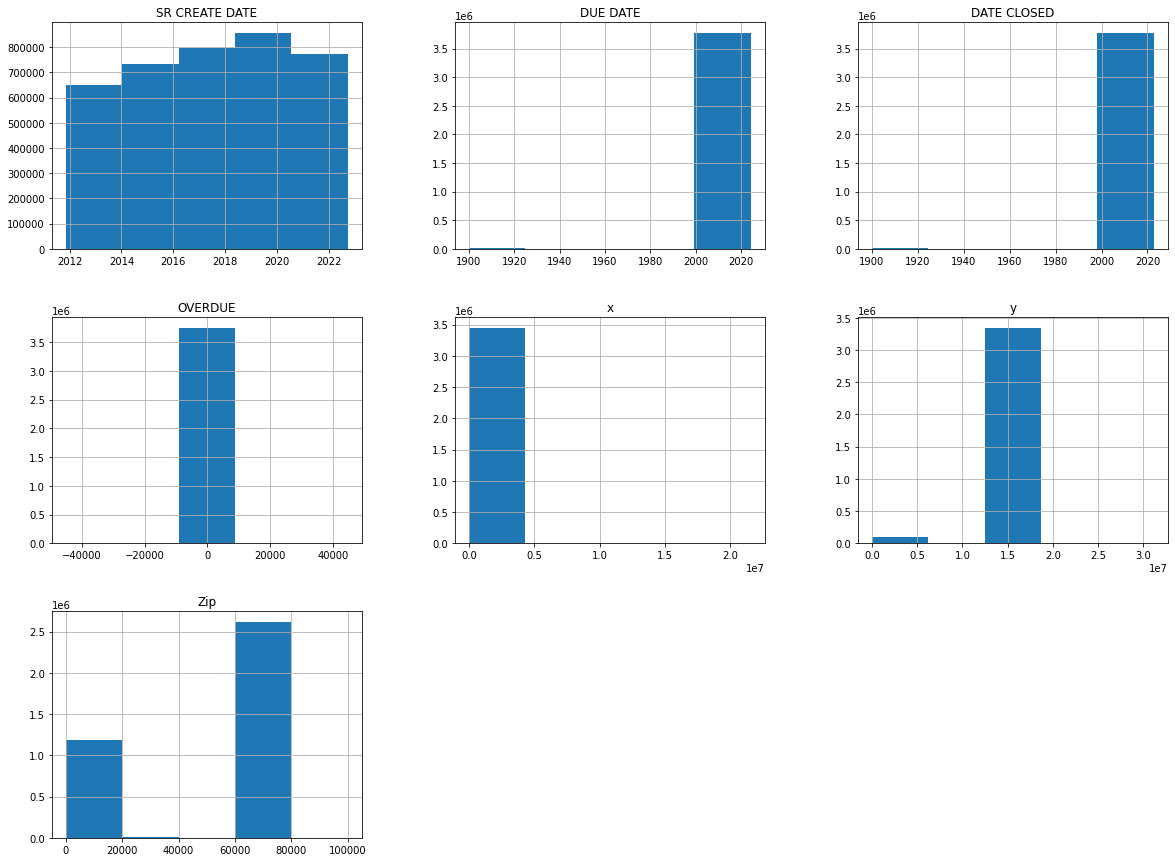

In [ ]:
meta_311.hist(bins=5, figsize=(20,15))
plt.show

In [ ]:
#remove outliers in overdue
print("Highest allowed",meta_311['OVERDUE'].mean() + 3*meta_311['OVERDUE'].std())
print("Lowest allowed",meta_311['OVERDUE'].mean() - 3*meta_311['OVERDUE'].std())

Highest allowed 8660.438918754184
Lowest allowed -8612.00080525271


In [ ]:
# displaying outliers
meta_311[(meta_311['OVERDUE'] > 10422) | (meta_311['OVERDUE'] < -10344)]

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type,Zip
13,2100012116,812 PECORE ST Houston Texas 77009,NaN,H,GREATER HEIGHTS,0373140070003,NW,NW,THURSDAY,3rd Wednesday,...,2021-07-15 00:34:53,1900-01-01 00:00:00,-44390.02,Recycling Cart Repair - 2100012116 - 812 PECOR...,3.116113e+06,1.385266e+07,29.79028,-95.38131,Phone,77009
15,197407-2100012118,4705 POLK ST HOUSTON TX 77023,NaN,I,GREATER EASTWOOD,0130400000015,SE,SE,MONDAY,1st Wednesday,...,2022-03-18 22:00:00,1900-01-01 00:00:00,-44636.92,Nuisance On Property - 197407-2100012118 - 470...,3.133107e+06,1.383394e+07,29.7374,-95.32962,Portal,77023
29,2100012135,8403 DELWIN ST Houston Texas 77034,NaN,E,EDGEBROOK AREA,0870880000001,SE,SW,THURSDAY,2nd Tuesday,...,1900-01-01 00:00:00,2021-07-10 12:30:14,44385.52,Container Repair - 2100012135 - 8403 DELWIN ST,3.168354e+06,1.379920e+07,29.63884,-95.22214,Phone,77034
49,2100012156,4061 MCDERMED DR HOUSTON TX 77025,NaN,K,NEAR SOUTHWEST,0771740100320,SW,SE,THURSDAY,3rd Tuesday,...,1900-01-01 00:00:00,2021-07-08 17:19:13,44383.72,Container Repair - 2100012156 - 4061 MCDERMED DR,3.097955e+06,1.380804e+07,29.6692,-95.44281,Portal,77025
56,197410-2100012163,4702 PROVIDENCE ST Houston Texas 77020,NaN,B,GREATER FIFTH WARD,0610230140001,NE,NW,FRIDAY,1st Thursday,...,2022-03-18 22:00:00,1900-01-01 00:00:00,-44636.92,Nuisance On Property - 197410-2100012163 - 470...,3.134803e+06,1.384606e+07,29.77073,-95.3231,Phone,77020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173294,2100304193,4620 W FUQUA ST Houston Texas 77045,NaN,K,CENTRAL SOUTHWEST,0411010000106,NaN,NaN,NaN,NaN,...,2022-01-29 22:24:23,1900-01-01 00:00:00,-44588.93,Trash Dumping or Illegal Dumpsite - 2100304193...,3.096879e+06,1.378782e+07,29.6137,-95.44813,Phone,77045
173301,2100304200,2122 WOODLAND PARK DR Houston Texas 77077,NaN,G,BRIAR FOREST,1111000000020,NW,NW,MONDAY,4th Wednesday,...,1900-01-01 00:00:00,2022-01-02 06:00:01,44561.25,New CIP Request - 2100304200 - 2122 WOODLAND P...,3.053426e+06,1.383378e+07,29.7436,-95.58061,Email,77077
173319,20190038-2100304220,1311 LAURENTIDE ST Houston Texas 77029,NaN,B,PLEASANTVILLE AREA,0842330000019,NE,NE,FRIDAY,1st Tuesday,...,1900-01-01 00:00:00,2022-01-04 08:46:09,44563.37,Sewer Wastewater - 20190038-2100304220 - 1311 ...,3.152773e+06,1.384497e+07,29.76601,-95.26657,Phone,77029
173320,2100304221,5039 SPRUCE FOREST DR Houston Texas 77091,NaN,A,CENTRAL NORTHWEST,1086490010003,NW,NW,THURSDAY,4th Tuesday,...,1900-01-01 00:00:00,2022-01-13 11:37:03,44572.48,2100304221,3.088282e+06,1.387152e+07,29.8445,-95.46723,Phone,77091


In [ ]:
#removing outliers
meta_311 = meta_311[(meta_311['OVERDUE'] < 10422) & (meta_311['OVERDUE'] > -10344)]
meta_311

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type,Zip
0,1100329481-101000461231,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,2011-12-19 01:24:57,2011-12-29 20:33:19,10.80,Investigate minor main line break,NaN,NaN,Unknown,Unknown,Unknown,0
1,1100329484-101000461236,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,2011-12-19 02:12:52,2011-12-29 20:33:53,10.76,Investigate minor main line break,NaN,NaN,Unknown,Unknown,Unknown,0
2,101000451923,"611 WALKER, HOUSTON TX 77002",Harris,I,DOWNTOWN,0010890000001,NaN,NaN,NaN,NaN,...,2011-11-24 05:15:33,2011-11-09 05:28:13,-14.99,Contact Forestry to request a tree to plant in...,NaN,NaN,29.75989828,-95.36705705,Voice In,77002
3,101000451924,"611 WALKER, HOUSTON TX 77002",Harris,I,DOWNTOWN,0010890000001,NaN,NaN,NaN,NaN,...,2011-11-24 05:17:49,2011-11-09 05:28:02,-14.99,Contact Forestry to request a tree to plant in...,NaN,NaN,29.75989828,-95.36705705,Voice In,77002
4,101000451925,"TEST, TEST",NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,2011-11-24 05:28:51,2012-10-23 10:21:29,334.20,Contact Forestry to request a tree to plant in...,NaN,NaN,NaN,NaN,Voice In,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241919,2200573704,HAMMERLY BLVD BLALOCK RD HOUSTON TX 77080,NaN,A,SPRING BRANCH CENTRAL,0751250000015,NW,NE,FRIDAY,4th Friday,...,2022-09-23 22:00:00,2022-09-06 14:46:00,-17.30,Bandit Sign - 2200573704 - HAMMERLY BLVD BLALO...,3.070451e+06,1.385844e+07,29.8098,-95.5245,Portal,0
241920,230828-2200573703,2002 WHITE ST HOUSTON TX 77007,NaN,H,WASHINGTON AVENUE COALITION / MEMORIAL PARK,1329840010001,NW,NW,MONDAY,1st Wednesday,...,2023-05-22 22:00:00,2022-09-06 15:32:00,-258.27,Nuisance On Property - 230828-2200573703 - 200...,3.117337e+06,1.384751e+07,29.7761,-95.378,Portal,0
241921,12504976-2200573702,S MACGREGOR DR CAMBRIDGE ST Houston Texas 77030,NaN,D,MEDICAL CENTER AREA,none,NaN,NaN,NaN,NaN,...,2022-09-11 00:04:00,2022-08-31 19:19:00,-10.20,Street Hazard - 12504976-2200573702 - S MACGRE...,3.114070e+06,1.382269e+07,29.7082,-95.3905,Phone,0
241922,230824-2200573700,4810 HIRSCH RD Houston Texas 77026,NaN,B,KASHMERE GARDENS,0661080060163,NE,NE,FRIDAY,1st Thursday,...,2023-05-22 22:00:00,2022-09-12 16:32:00,-252.23,Nuisance On Property - 230824-2200573700 - 481...,3.132866e+06,1.385830e+07,29.8044,-95.328,Phone,0


In [ ]:
# Capping on Outliers
upper_limit = meta_311['OVERDUE'].mean() + 3*meta_311['OVERDUE'].std()
lower_limit = meta_311['OVERDUE'].mean() - 3*meta_311['OVERDUE'].std()

In [ ]:
upper_limit, lower_limit

(228.57023305057533, -253.55654855147338)

In [ ]:
# apply capping
meta_311['OVERDUE'] = np.where(meta_311['OVERDUE'] > upper_limit, upper_limit,
                               np.where(meta_311['OVERDUE'] < lower_limit, lower_limit,
                                        meta_311['OVERDUE']))

In [ ]:
meta_311['OVERDUE'].describe()

count    3.749815e+06
mean    -1.442764e+01
std      5.825308e+01
min     -2.535565e+02
25%     -1.386000e+01
50%     -4.840000e+00
75%     -8.600000e-01
max      2.285702e+02
Name: OVERDUE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51ea2e350>]],
      dtype=object)

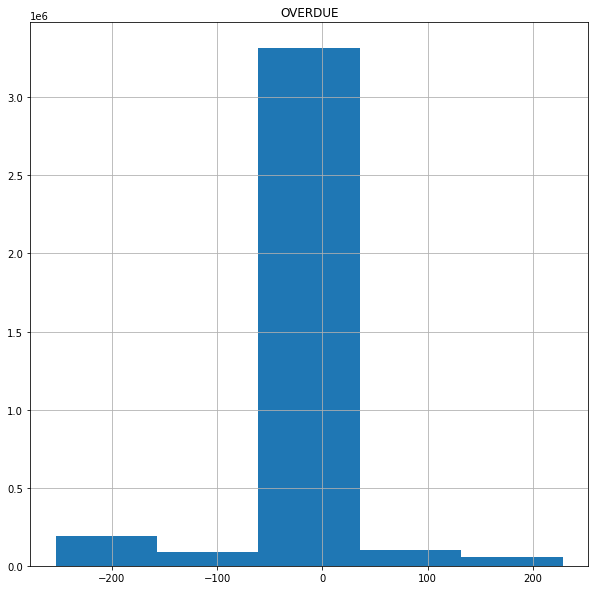

In [ ]:
meta_311.hist('OVERDUE', bins=5, figsize=(10,10))


In [ ]:
# remove any dates before jan 01 2011
meta_311 = meta_311[~(meta_311['DUE DATE'] < '2011-01-01')]
meta_311 = meta_311[~(meta_311['DUE DATE'] > '2022-10-01')]


meta_311 = meta_311[~(meta_311['DATE CLOSED'] < '2011-01-01')]
meta_311 = meta_311[~(meta_311['DATE CLOSED'] > '2022-10-01')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51e53ce10>]],
      dtype=object)

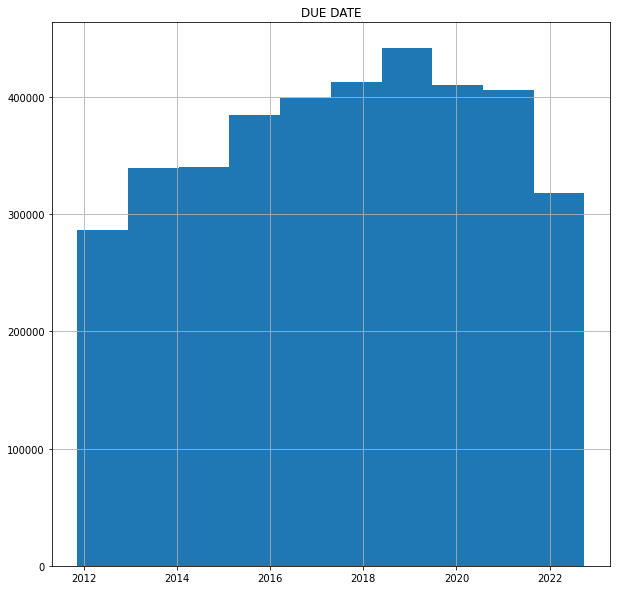

In [ ]:
meta_311.hist('DUE DATE', bins=10, figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51e483390>]],
      dtype=object)

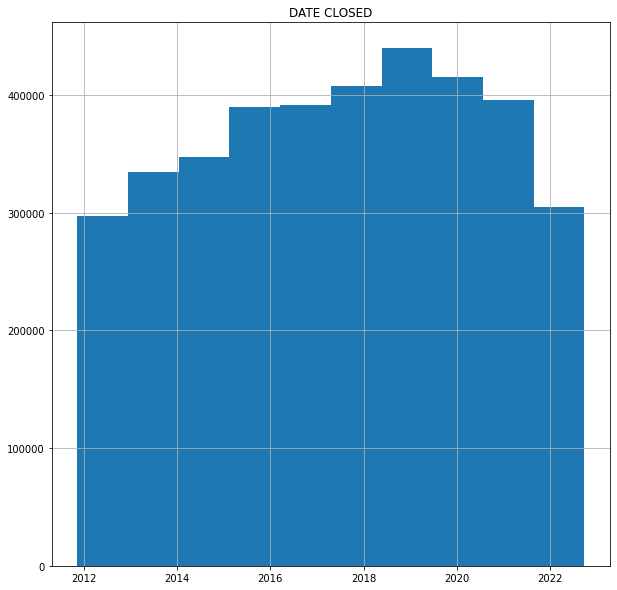

In [ ]:
meta_311.hist('DATE CLOSED', bins=10, figsize=(10,10))


In [ ]:
ds_unsupervised = meta_311[['OVERDUE','LATITUDE','LONGITUDE']]

In [ ]:
# count all values in SR TYPE column
#ds_unsupervised['SR TYPE'].value_counts(ascending=False)

In [ ]:
#ds_unsupervised.loc[ds_unsupervised['SR TYPE'] == 'Nuisance On Property']

In [ ]:
# ds_unsupervised = ds_unsupervised.drop(columns=['SR TYPE'])
# ds_unsupervised

In [ ]:
# missing values
print('Missing values [Before]: \n', ds_unsupervised.isnull().sum())

Missing values [Before]: 
 OVERDUE          0
LATITUDE     85390
LONGITUDE    85390
dtype: int64


In [ ]:
ds_unsupervised = ds_unsupervised.replace('Unknown', np.NaN)

In [ ]:
ds_unsupervised = ds_unsupervised.dropna()

In [ ]:
# Convert multiple columns
ds_unsupervised = ds_unsupervised.astype({'LATITUDE':'float','LONGITUDE':'float','OVERDUE':'float'})

In [ ]:
#removing outliers outside of Houston
ds_unsupervised = ds_unsupervised[(ds_unsupervised['LONGITUDE'] > -96) & (ds_unsupervised['LONGITUDE'] < -94.75)]
ds_unsupervised = ds_unsupervised[(ds_unsupervised['LATITUDE'] > 29.3) & (ds_unsupervised['LATITUDE'] < 30.1)]
ds_unsupervised

,OVERDUE,LATITUDE,LONGITUDE
2,-14.99,29.759898,-95.367057
3,-14.99,29.759898,-95.367057
5,-158.39,29.759898,-95.367057
10,48.47,29.694706,-95.338928
12,-2.79,29.711415,-95.407555
...,...,...,...
241916,-17.30,29.809800,-95.526200
241917,15.62,29.868400,-95.340600
241919,-17.30,29.809800,-95.524500
241921,-10.20,29.708200,-95.390500


In [ ]:
def categorise(row):
    if row['OVERDUE'] > 0 :
        return 1
    elif row['OVERDUE'] <= 0:
        return 0

In [ ]:
ds_unsupervised['DUE']  = ds_unsupervised.apply(lambda row: categorise(row), axis=1)

In [ ]:
# count all values in SR TYPE column
ds_unsupervised['DUE'].value_counts(ascending=False)

0    2938450
1     687771
Name: DUE, dtype: int64

In [ ]:
ds_unsupervised = ds_unsupervised.loc[ds_unsupervised['DUE'] == 1]
ds_unsupervised

,OVERDUE,LATITUDE,LONGITUDE,DUE
10,48.47,29.694706,-95.338928,1
14,3.11,29.630333,-95.464071,1
17,42.91,29.587757,-95.457265,1
19,1.06,29.823769,-95.363857,1
25,43.06,29.677567,-95.281319,1
...,...,...,...,...
241795,2.03,29.754400,-95.469800,1
241799,11.74,29.700000,-95.474800,1
241835,1.51,29.778400,-95.549900,1
241869,0.39,29.757000,-95.361900,1


In [ ]:
#ds_unsupervised = ds_unsupervised.drop(columns=['OVERDUE'])

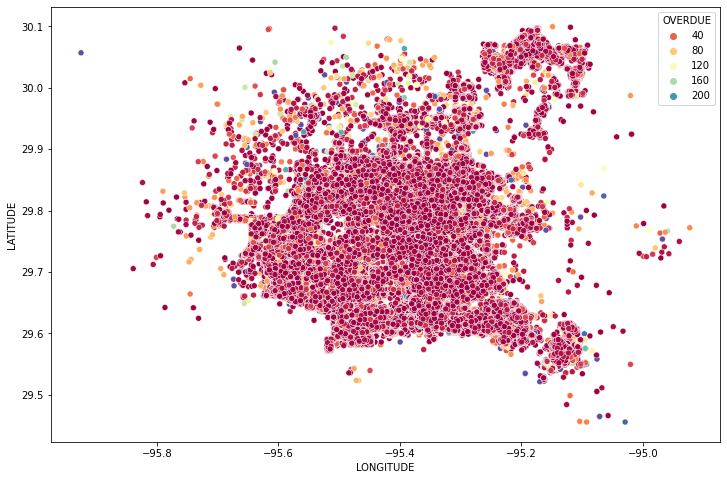

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=ds_unsupervised, x="LONGITUDE", y="LATITUDE", hue='OVERDUE', palette="Spectral")

In [ ]:
ds_unsupervised.describe()

,OVERDUE,LATITUDE,LONGITUDE,DUE
count,687771.000000,687771.000000,687771.000000,687771.0
mean,31.543267,29.746440,-95.391219,1.0
std,56.259167,0.093542,0.106865,0.0
min,0.010000,29.455842,-95.924906,1.0
25%,1.840000,29.676549,-95.468471,1.0
50%,7.730000,29.742657,-95.382986,1.0
75%,28.910000,29.807616,-95.321039,1.0
max,228.570233,30.099405,-94.922661,1.0


In [ ]:
# Drop unecessary columns
meta_311 = meta_311.drop(columns=['TAX ID','x','y','LATITUDE','LONGITUDE',
                      'KEY MAP', 'CASE NUMBER','Title',
                      'STATUS',"COUNTY", "SLA", "SR LOCATION", 'DUE DATE', 'DATE CLOSED'])

In [ ]:
# missing values
print('Missing values [Before]: \n', meta_311 .isnull().sum())

Missing values [Before]: 
 DISTRICT                 19932
NEIGHBORHOOD             41604
TRASH QUAD              880345
RECYCLE QUAD            900447
TRASH DAY              1084880
HEAVY TRASH DAY         886239
RECYCLE DAY             908357
MANAGEMENT DISTRICT    2081889
DEPARTMENT                   0
DIVISION                     0
SR TYPE                      0
QUEUE                   172644
SR CREATE DATE               0
OVERDUE                      0
Channel Type                 0
Zip                          0
dtype: int64


In [ ]:
print('Row count is:', len(meta_311))

Row count is: 3736629


In [ ]:
# drop columns with >= 20% of missing values
perc = 20.0 # N%
min_count =  int(((100-perc)/100)*meta_311.shape[0] + 1)
meta_311 = meta_311.dropna( axis=1, thresh=min_count)

In [ ]:
print('Row count is:', len(meta_311))

Row count is: 3736629


In [ ]:
# drop values with zipcode less than 77000 (would indicate a non Houston zip or test zip)
# the following URL shows all zipcodes for houston are between 77002 -77598
# https://namecensus.com/zip-codes/texas/city/houston/

meta_311 = meta_311[(meta_311['Zip'] >= 77002) & (meta_311['Zip'] <= 77598)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff51942fa90>]],
      dtype=object)

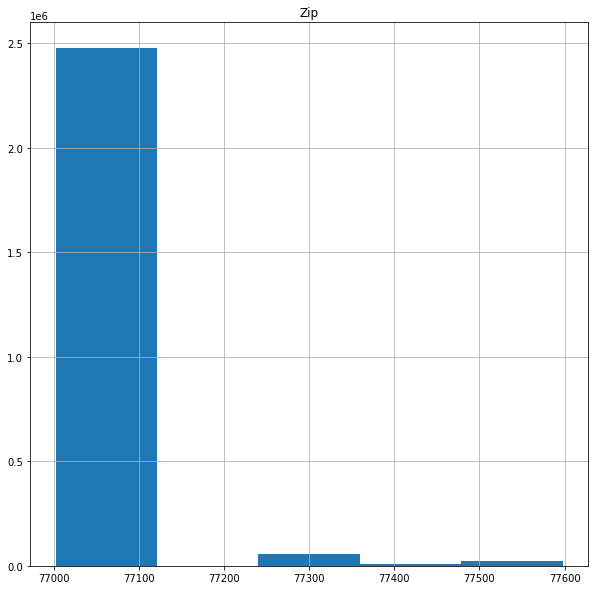

In [ ]:
meta_311.hist('Zip', bins=5, figsize=(10,10))


In [ ]:
print('Row count is:', len(meta_311))

Row count is: 2567581


In [ ]:
# missing values
print('Missing values [After]: \n', meta_311 .isnull().sum())

Missing values [After]: 
 DISTRICT            6076
NEIGHBORHOOD        7845
DEPARTMENT             0
DIVISION               0
SR TYPE                0
QUEUE             144902
SR CREATE DATE         0
OVERDUE                0
Channel Type           0
Zip                    0
dtype: int64


In [ ]:
# repalce nan values with unknown as value
columns_list = ['DISTRICT', 'NEIGHBORHOOD', 'DEPARTMENT', 'DIVISION',
                'SR TYPE', 'QUEUE', 'Channel Type']
for col in columns_list:
  # replacing na values with
  meta_311[col].fillna("Unknown", inplace = True)

# we dont want to alter the null values of dates so
# will drop the null values
date_list = ['SR CREATE DATE'] #, 'DUE DATE', 'DATE CLOSED'
for day in date_list:
  meta_311 = meta_311[meta_311[day].notna()]

In [ ]:
for col in meta_311:
  print(str(col))
  print("total unique values: ", meta_311[col].nunique())
  print(meta_311[col].unique())
  print()

DISTRICT
total unique values:  12
['I' 'D' 'C' 'K' 'A' 'H' 'J' 'G' 'B' 'E' 'F' 'Unknown']

NEIGHBORHOOD
total unique values:  97
['DOWNTOWN' 'GREATER OST / SOUTH UNION' 'UNIVERSITY PLACE'
 'FORT BEND HOUSTON' 'SPRING BRANCH WEST' 'NORTHSIDE/NORTHLINE'
 'SOUTH PARK' 'SHARPSTOWN' 'GREATER HEIGHTS'
 'GOLFCREST / BELLFORT / REVEILLE' 'AFTON OAKS / RIVER OAKS AREA'
 'MEYERLAND AREA' 'BRAEBURN' 'GREATER INWOOD' 'GREATER FIFTH WARD'
 'BRAYS OAKS' 'ACRES HOME' 'KINGWOOD AREA' 'EAST HOUSTON'
 'TRINITY / HOUSTON GARDENS' 'CENTRAL NORTHWEST' 'EASTEX - JENSEN AREA'
 'SUNNYSIDE' 'SOUTH ACRES / CRESTMONT PARK'
 'WASHINGTON AVENUE COALITION / MEMORIAL P' 'MEMORIAL'
 'MEADOWBROOK / ALLENDALE' 'NEARTOWN - MONTROSE' 'NEAR NORTHSIDE'
 'BRAESWOOD' 'MAGNOLIA PARK' 'CENTRAL SOUTHWEST' 'GREATER UPTOWN'
 'PARK PLACE' 'EAST LITTLE YORK / HOMESTEAD' 'CLINTON PARK TRI-COMMUNITY'
 'EDGEBROOK AREA' 'DENVER HARBOR / PORT HOUSTON' 'MID WEST'
 'IAH / AIRPORT AREA' 'INDEPENDENCE HEIGHTS' 'SPRING BRANCH NORTH'
 'LANGWO

In [ ]:
# Change not aplicable to unknown on feature channel type
meta_311['Channel Type'] = meta_311['Channel Type'].replace({'Not Applicable': 'Unknown'})
meta_311['Channel Type'].unique()

array(['Voice In', 'WEB', 'Mail In', 'Unknown', 'e-mail In', 'Face2Face',
       'SMS In', 'Fax In', 'WAP', 'Phone', 'Portal', 'In Person', 'Email',
       'Chat', 'App', 'Social Media', 'Letter', 'Fax', 'SMS'],
      dtype=object)

In [ ]:
meta_311['Zip'].nunique()

158

In [ ]:
print('Row count is:', len(meta_311))

Row count is: 2567581


In [ ]:
# there should be zero missing values
print('Missing values [After]: \n', meta_311 .isnull().sum())

Missing values [After]: 
 DISTRICT          0
NEIGHBORHOOD      0
DEPARTMENT        0
DIVISION          0
SR TYPE           0
QUEUE             0
SR CREATE DATE    0
OVERDUE           0
Channel Type      0
Zip               0
dtype: int64


In [ ]:
#rearrange column to have datetimes at the beggining
meta_311 = meta_311[['OVERDUE', 'SR CREATE DATE','DISTRICT', 'NEIGHBORHOOD', 'DEPARTMENT', 'DIVISION',
                'SR TYPE', 'QUEUE', 'Channel Type','Zip']]

In [ ]:
# Make a copy of the clean DataFrame
df_tmp = meta_311.copy()

In [ ]:
meta_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567581 entries, 2 to 163838
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   OVERDUE         float64       
 1   SR CREATE DATE  datetime64[ns]
 2   DISTRICT        object        
 3   NEIGHBORHOOD    object        
 4   DEPARTMENT      object        
 5   DIVISION        object        
 6   SR TYPE         object        
 7   QUEUE           object        
 8   Channel Type    object        
 9   Zip             int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 215.5+ MB


### convert string to categorical then, standardize it

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# convert to string and then turn to categorical suing label encoder
str2cat=['DISTRICT', 'NEIGHBORHOOD', 'DEPARTMENT', 'DIVISION',
                'SR TYPE', 'QUEUE', 'Channel Type','Zip']
le = LabelEncoder()
scaler = StandardScaler()
for strs in str2cat:
  meta_311[strs] = meta_311[strs].astype(str)
  meta_311[strs] = le.fit_transform(meta_311[strs])


In [ ]:
meta_311.head(5)

,OVERDUE,SR CREATE DATE,DISTRICT,NEIGHBORHOOD,DEPARTMENT,DIVISION,SR TYPE,QUEUE,Channel Type,Zip
2,-14.99,2011-11-09 05:15:37,8,17,23,16,296,144,15,0
3,-14.99,2011-11-09 05:17:50,8,17,23,16,296,144,15,0
5,-158.39,2011-11-09 05:34:35,8,17,23,16,299,144,15,0
10,48.47,2011-11-09 06:35:56,3,36,24,30,116,151,15,19
12,-2.79,2011-11-09 06:44:49,2,87,28,2,174,175,15,28


In [ ]:
meta_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567581 entries, 2 to 163838
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   OVERDUE         float64       
 1   SR CREATE DATE  datetime64[ns]
 2   DISTRICT        int64         
 3   NEIGHBORHOOD    int64         
 4   DEPARTMENT      int64         
 5   DIVISION        int64         
 6   SR TYPE         int64         
 7   QUEUE           int64         
 8   Channel Type    int64         
 9   Zip             int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 215.5 MB


In [ ]:
#standardize data except for datetime features
meta_311[meta_311.columns[2:]] = scaler.fit_transform(meta_311[meta_311.columns[2:]])

In [ ]:
meta_311.head(5)

,OVERDUE,SR CREATE DATE,DISTRICT,NEIGHBORHOOD,DEPARTMENT,DIVISION,SR TYPE,QUEUE,Channel Type,Zip
2,-14.99,2011-11-09 05:15:37,1.114563,-1.093571,-0.315375,-0.427605,1.193262,-0.240001,0.264298,-1.267736
3,-14.99,2011-11-09 05:17:50,1.114563,-1.093571,-0.315375,-0.427605,1.193262,-0.240001,0.264298,-1.267736
5,-158.39,2011-11-09 05:34:35,1.114563,-1.093571,-0.315375,-0.427605,1.226068,-0.240001,0.264298,-1.267736
10,48.47,2011-11-09 06:35:56,-0.467451,-0.395136,-0.102750,0.507442,-0.775107,-0.057630,0.264298,-0.684736
12,-2.79,2011-11-09 06:44:49,-0.783854,1.479609,0.747748,-1.362653,-0.140855,0.567639,0.264298,-0.408579


## datetime features
extract the day of the year and the hour of the day

In [ ]:
from datetime import datetime

In [ ]:
def new_date(current_date, t, date_f):
  '''
  function that extracts the sinus and the cosine of days and hours, given a date
  '''
  cdate = current_date #datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')

  # sr create date (scd)
  if date_f == "SR CREATE DATE":
    if t == 'scd_hour_sin':
      return np.sin(2 * np.pi * cdate.hour/24.0)

    if t == 'scd_hour_cos':
      return np.cos(2 * np.pi * cdate.hour/24.0)

    if t == 'scd_month_sin':
      return np.sin(2 * np.pi * cdate.month/12.0)

    if t == 'scd_month_cos':
      return np.cos(2 * np.pi * cdate.month/12.0)

    if t == 'scd_day_sin':
      return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)

    if t == 'scd_day_cos':
      return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

  # due date (dd)
  if date_f == "DUE DATE":
    if t == 'dd_hour_sin':
      return np.sin(2 * np.pi * cdate.hour/24.0)

    if t == 'dd_hour_cos':
      return np.cos(2 * np.pi * cdate.hour/24.0)

    if t == 'dd_month_sin':
      return np.sin(2 * np.pi * cdate.month/12.0)

    if t == 'dd_month_cos':
      return np.cos(2 * np.pi * cdate.month/12.0)

    if t == 'dd_day_sin':
      return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)

    if t == 'dd_day_cos':
      return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

  # closed date (cd)
  if date_f == "DATE CLOSED":
    if t == 'cd_hour_sin':
      return np.sin(2 * np.pi * cdate.hour/24.0)

    if t == 'cd_hour_cos':
      return np.cos(2 * np.pi * cdate.hour/24.0)

    if t == 'cd_month_sin':
      return np.sin(2 * np.pi * cdate.month/12.0)

    if t == 'cd_month_cos':
      return np.cos(2 * np.pi * cdate.month/12.0)

    if t == 'cd_day_sin':
      return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)

    if t == 'cd_day_cos':
      return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)

In [ ]:
scd_types = ['scd_hour_sin', 'scd_hour_cos', 'scd_day_sin', 'scd_day_cos','scd_month_sin','scd_month_cos']

# dd_types =['dd_hour_sin', 'dd_hour_cos', 'dd_day_sin', 'dd_day_cos','dd_month_sin','dd_month_cos']

# cd_types =['cd_hour_sin', 'cd_hour_cos', 'cd_day_sin', 'cd_day_cos','cd_month_sin','cd_month_cos']

for dt in scd_types:
  meta_311[dt] = meta_311['SR CREATE DATE'].apply(lambda x : new_date(x, dt, 'SR CREATE DATE'))
meta_311.drop(['SR CREATE DATE'],axis=1,inplace=True)

# for dt in dd_types:
#   meta_311[dt] = meta_311['DUE DATE'].apply(lambda x : new_date(x, dt, 'DUE DATE'))
# meta_311.drop(['DUE DATE'],axis=1,inplace=True)

# for dt in cd_types:
#   meta_311[dt] = meta_311['DATE CLOSED'].apply(lambda x : new_date(x, dt, 'DATE CLOSED'))
# meta_311.drop(['DATE CLOSED'],axis=1,inplace=True)

In [ ]:
# generate due feature
# 1 is overdue
# 0 is ontime
meta_311['DUE']  = meta_311.apply(lambda row: categorise(row), axis=1)

In [ ]:
#rearrange column to have due at the beggining
meta_311 = meta_311[['DUE','OVERDUE', 'DISTRICT', 'NEIGHBORHOOD', 'DEPARTMENT', 'DIVISION',
       'SR TYPE', 'QUEUE', 'Channel Type', 'Zip', 'scd_hour_sin',
       'scd_hour_cos', 'scd_day_sin', 'scd_day_cos', 'scd_month_sin',
       'scd_month_cos']]

In [ ]:
meta_311.head(5)

,DUE,OVERDUE,DISTRICT,NEIGHBORHOOD,DEPARTMENT,DIVISION,SR TYPE,QUEUE,Channel Type,Zip,scd_hour_sin,scd_hour_cos,scd_day_sin,scd_day_cos,scd_month_sin,scd_month_cos
2,0,-14.99,1.114563,-1.093571,-0.315375,-0.427605,1.193262,-0.240001,0.264298,-1.267736,0.965926,2.588190e-01,-0.780296,0.625411,-0.5,0.866025
3,0,-14.99,1.114563,-1.093571,-0.315375,-0.427605,1.193262,-0.240001,0.264298,-1.267736,0.965926,2.588190e-01,-0.780296,0.625411,-0.5,0.866025
5,0,-158.39,1.114563,-1.093571,-0.315375,-0.427605,1.226068,-0.240001,0.264298,-1.267736,0.965926,2.588190e-01,-0.780296,0.625411,-0.5,0.866025
10,1,48.47,-0.467451,-0.395136,-0.102750,0.507442,-0.775107,-0.057630,0.264298,-0.684736,1.000000,6.123234e-17,-0.780296,0.625411,-0.5,0.866025
12,0,-2.79,-0.783854,1.479609,0.747748,-1.362653,-0.140855,0.567639,0.264298,-0.408579,1.000000,6.123234e-17,-0.780296,0.625411,-0.5,0.866025


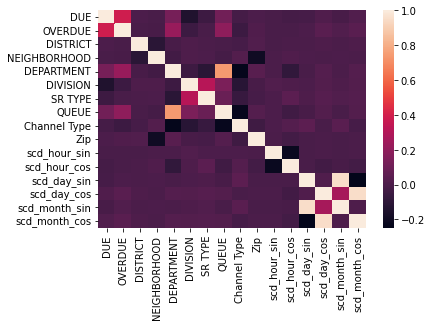

In [ ]:
# calculate the correlation among features, to
# check if there are some features highly correlated.
# In such a case, one of the two features could be dropped
corr = meta_311.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
corr

,DUE,OVERDUE,DISTRICT,NEIGHBORHOOD,DEPARTMENT,DIVISION,SR TYPE,QUEUE,Channel Type,Zip,scd_hour_sin,scd_hour_cos,scd_day_sin,scd_day_cos,scd_month_sin,scd_month_cos
DUE,1.000000,0.389707,0.003614,-0.006010,0.130268,-0.145087,-0.045185,0.113260,-0.020561,0.005045,-0.006488,-0.021199,-0.015717,0.012167,-0.011841,0.015930
OVERDUE,0.389707,1.000000,-0.007309,-0.010917,0.225342,-0.051756,-0.006411,0.197834,-0.052822,0.011966,-0.006095,-0.007695,0.004473,0.042999,0.015440,0.039565
DISTRICT,0.003614,-0.007309,1.000000,-0.110458,-0.010415,0.007373,-0.000528,-0.005418,-0.018692,0.017521,-0.006184,-0.004014,-0.002550,0.006355,-0.000671,0.006585
NEIGHBORHOOD,-0.006010,-0.010917,-0.110458,1.000000,-0.031109,0.007299,0.002989,-0.023166,0.023290,-0.198902,-0.001750,0.013732,0.004861,-0.000692,0.004073,-0.001900
DEPARTMENT,0.130268,0.225342,-0.010415,-0.031109,1.000000,-0.046233,-0.109146,0.740609,-0.233662,0.039268,-0.002949,-0.082597,-0.008411,0.027966,-0.000620,0.028794
DIVISION,-0.145087,-0.051756,0.007373,0.007299,-0.046233,1.000000,0.316886,0.142267,-0.111733,-0.009297,0.020005,0.008581,0.002693,0.022669,0.009265,0.020699
SR TYPE,-0.045185,-0.006411,-0.000528,0.002989,-0.109146,0.316886,1.000000,0.091192,-0.067340,-0.014379,0.002724,0.045679,0.009221,0.029972,0.016528,0.026405
QUEUE,0.113260,0.197834,-0.005418,-0.023166,0.740609,0.142267,0.091192,1.000000,-0.224090,0.026130,0.001717,-0.035672,-0.013716,0.020168,-0.007690,0.022502
Channel Type,-0.020561,-0.052822,-0.018692,0.023290,-0.233662,-0.111733,-0.067340,-0.224090,1.000000,-0.040654,0.004219,0.029075,0.049463,-0.006704,0.043447,-0.017719
Zip,0.005045,0.011966,0.017521,-0.198902,0.039268,-0.009297,-0.014379,0.026130,-0.040654,1.000000,-0.003640,-0.026839,-0.004539,-0.003258,-0.005112,-0.002291


In [ ]:
corr["OVERDUE"].sort_values(ascending=False)

OVERDUE          1.000000
DUE              0.389707
DEPARTMENT       0.225342
QUEUE            0.197834
scd_day_cos      0.042999
scd_month_cos    0.039565
scd_month_sin    0.015440
Zip              0.011966
scd_day_sin      0.004473
scd_hour_sin    -0.006095
SR TYPE         -0.006411
DISTRICT        -0.007309
scd_hour_cos    -0.007695
NEIGHBORHOOD    -0.010917
DIVISION        -0.051756
Channel Type    -0.052822
Name: OVERDUE, dtype: float64

features with a score between 0.01 to -0.01 will be deleted.
features deleted and their score:

scd_day_sin      0.004473 <br>
scd_hour_sin    -0.006095<br>
SR TYPE         -0.006411<br>
DISTRICT        -0.007309<br>
scd_hour_cos    -0.007695<br>



In [ ]:
meta_311 = meta_311.drop(columns=['scd_hour_sin',	'scd_hour_cos',	'scd_day_sin','DISTRICT', 'SR TYPE'])
meta_311

,DUE,OVERDUE,NEIGHBORHOOD,DEPARTMENT,DIVISION,QUEUE,Channel Type,Zip,scd_day_cos,scd_month_sin,scd_month_cos
2,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
3,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
5,0,-158.39,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
10,1,48.47,-0.395136,-0.102750,0.507442,-0.057630,0.264298,-0.684736,0.625411,-0.5,0.866025
12,0,-2.79,1.479609,0.747748,-1.362653,0.567639,0.264298,-0.408579,0.625411,-0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...
163834,0,-30.04,-1.608207,0.535123,1.375700,1.375279,-2.518302,1.677948,-0.938377,-0.5,-0.866025
163835,0,-3.21,-0.983292,0.960373,1.041755,0.437375,-2.518302,1.493843,-0.938377,-0.5,-0.866025
163836,0,-0.21,-0.468656,0.322499,-0.160449,-0.370265,-2.518302,0.941527,-0.938377,-0.5,-0.866025
163837,0,-3.22,-0.505416,0.960373,-1.362653,0.228952,-2.518302,-1.052947,-0.938377,-0.5,-0.866025


In [ ]:
meta_311.head(2)

,DUE,OVERDUE,NEIGHBORHOOD,DEPARTMENT,DIVISION,QUEUE,Channel Type,Zip,scd_day_cos,scd_month_sin,scd_month_cos
2,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025
3,0,-14.99,-1.093571,-0.315375,-0.427605,-0.240001,0.264298,-1.267736,0.625411,-0.5,0.866025


In [ ]:
# turn meta dataframe to csv
meta_311.to_csv(data_dir_csv + "meta_311.csv")

In [ ]:
ds_unsupervised.head(2)

,OVERDUE,LATITUDE,LONGITUDE,DUE
10,48.47,29.694706,-95.338928,1
14,3.11,29.630333,-95.464071,1


In [ ]:
# turn unsupervised dataframe to csv
ds_unsupervised.to_csv(data_dir_csv + "ds_unsupervised.csv")